# Modelo Epidemiológico - COVID-19 en Italia


# Modelo
Un modelo es una descripción simplificada de un proceso complejo.

# ¿Por qué querriamos un modelo?
a. Para mejorar nuestra comprensión de como funciona el proceso.

b. Para predecir como cambiaria el sistema en el tiempo.

c. Para visualizar la respuesta del sistema hacia diversas manipulaciones.

El siguiente código implementa un modelo epidemiológico SEILR para el COVID-19 en Italia desde febrero hasta junio, utilizando ecuaciones diferenciales y el método de Runge-Kutta de cuarto orden.

# ¿Que buscamos en un modelo?
a. Simplicidad (Comprensión).

b. Realismo (Predicción).

# Derivación del modelo
El modelo epidemiologico SEILR es una variación de los modelos SEIR.
La derivación del modelo es la misma que en el caso anterior ([Ver Modelo Covid](modelo-covid.ipynb)). Unicamente, en este caso lo que se pretende es simular todo el sistema SEIRL.


El sistema es el siguiente: 

$$
\begin{align}
    \frac{dS}{dt} &= -\frac{\beta IS}{N} \tag{1} \\
    \frac{dE}{dt} &= \frac{\beta IS}{N} - \epsilon E \tag{2} \\
    \frac{dI}{dt} &= \epsilon E - \gamma I \tag{3} \\
    \frac{dL}{dt} &= \gamma I - \delta L \tag{4} \\
    \frac{dR}{dt} &= \delta L \tag{5} \\
\end{align}
$$
Siendo:
- $N$: _La población total._
- $S$: El número de individuos Susceptibles.
- $E$: El número de individuos Expuestos que han contraído la infección pero aún no son infecciosos.
- $I$: El número de individuos Infectados.
- $L$: El número de sujetos que aún están infectados pero ya no son infecciosos debido a hospitalización, cuarentena, o porque los sujetos infectados son mayormente infecciosos solo durante los primeros días después del final del período de latencia.
- $R$: El número de individuos Recuperados y resistentes a futuras infecciones.
- $\beta$: La tasa de transmisión efectiva.
- $\epsilon$: La tasa inversa del período promedio de incubación antes de que uno se vuelva infeccioso.
- $\gamma$: La tasa inversa del tiempo promedio que los sujetos infectados pasan siendo infecciosos.
- $\delta$: La tasa inversa del tiempo promedio que los sujetos infectados permanecen enfermos pero no infecciosos.


Se abordarán los casos variando $\beta$ y observando como varía el comportamiento para diferentes valores. 
El primer caso vamos a suponer $\beta$  como: $ \beta_o(0.053t^2-0.6023t+1.5488)$
 



In [559]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de las ecuaciones diferenciales del sistema

In [560]:
def betaf(t, beta_0):
    t1 = 2
    rho1 = 0.56
    t2 = 19
    rho2 = 0.205
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [561]:
def edoS(y, t, beta_0, I, S, N, E, L, R, U, epsilon, landa, delta):
    return -betaf(t,beta_0) *I * y / N

In [562]:
def edoE(y, t, beta_0, I, S, N, E, L, R, U, epsilon, landa, delta):
    return betaf(t,beta_0) * I * S / N - epsilon * y

In [563]:
def edoI(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return epsilon * E - landa * y

In [564]:
def edoL(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return landa * I - delta * y

In [565]:
def edoR(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return delta * L

In [566]:
def edoU(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return 0.106*t-0.6023

Una vez definidas las ecuaciones diferenciales del sistema, procedemos a resolverlo usando métodos numéricos. Runge-Kutta de 4to orden.

In [567]:
def runge_kutta_cuarto_orden(fS, fE, fI, fL, fR,fU, S0, E0, I0, L0, R0, U0, t0, tf, h, beta, N, epsilon, landa, delta):
    # Implementa el método de Runge-Kutta de cuarto orden
    tiempo = np.arange(t0, tf + h, h)
    resS = []
    resE = []
    resI = []
    resL = []
    resR = []
    resU = []

    S_actual = S0
    E_actual = E0
    I_actual = I0
    L_actual = L0
    R_actual = R0
    U_actual = U0
    for t in tiempo:
        resS.append(S_actual)
        k1 = h * fS(S_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k2 = h * fS(S_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k3 = h * fS(S_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k4 = h * fS(S_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        S_actual = S_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resE.append(E_actual)
        k1 = h * fE(E_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k2 = h * fE(E_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k3 = h * fE(E_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fE(E_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        E_actual = E_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resI.append(I_actual)
        k1 = h * fI(I_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k2 = h * fI(I_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k3 = h * fI(I_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fI(I_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        I_actual = I_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resL.append(L_actual)
        k1 = h * fL(L_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k2 = h * fL(L_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual,epsilon, landa, delta)
        k3 = h * fL(L_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fL(L_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        L_actual = L_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resR.append(R_actual)
        k1 = h * fR(R_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k2 = h * fR(R_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k3 = h * fR(R_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fR(R_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        R_actual = R_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resU.append(U_actual)
        k1 = h * fU(U_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k2 = h * fU(U_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual,epsilon, landa, delta)
        k3 = h * fU(U_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fU(U_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        U_actual = U_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6


    return tiempo, np.array(resS), np.array(resE), np.array(resI), np.array(resL), np.array(resR), np.array(resU)


# Condiciones iniciales y llamado de la función

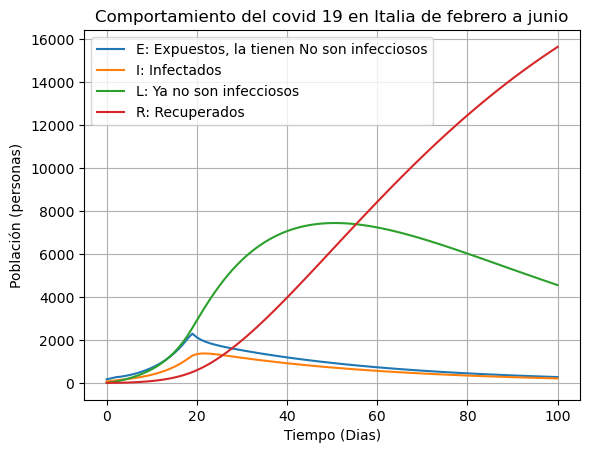

In [568]:
# Parámetros iniciales
R0 = 4  #El número básico de reproducción, ajustar según el país o la situación
S0 = 59100000  # Condición inicial

I0 = 67  # Condición inicial
L0 = 1  # Condición inicial
R0 = 4  # Condición inicial
U0 = 1  # Condición inicial
t0 = 0  # Tiempo inicial
tf = 100  # Tiempo final
h = 1  # Tamaño de paso
beta = 1.3
N = 59100000
#Calculando gamma (tasa de recuperación) y r0 (eigenvalor)

epsilon = 1 / 4.3
landa = 1 / 3.1
delta = 1 / 33
tau_m = 9  #Retraso en días
t1 = 2
rho1 = 0.56
t2 = 19
rho2 = 0.205
r0 = ((-(epsilon + landa)) + np.sqrt((epsilon + landa)**2 + 4 * epsilon * (beta - landa))) / 2

E0 = beta * I0 / (r0 + epsilon)  # Condición inicial

# Resuelve la ecuación diferencial utilizando Runge-Kutta de cuarto orden
tiempo, S, E, I, L, R, U = runge_kutta_cuarto_orden(edoS, edoE, edoI, edoL, edoR,edoU, S0, E0, I0, L0, R0, U0, t0, tf, h, beta, N, epsilon, landa, delta)

# Grafica los resultados
plt.plot(tiempo, E, label='E: Expuestos, la tienen No son infecciosos')
#plt.plot(tiempo, S, label='S: Susceptibles')
plt.plot(tiempo, I, label='I: Infectados')
plt.plot(tiempo, L, label='L: Ya no son infecciosos')
plt.plot(tiempo, R, label='R: Recuperados')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Población (personas)')
plt.title('Comportamiento del covid 19 en Italia de febrero a junio')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Perfil de Beta. Tasa de transmision efectiva para el modelo de Italia')

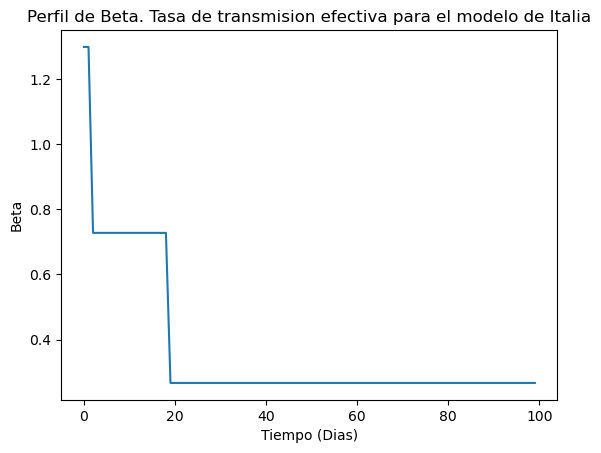

In [569]:
#El perfil de u ingresado para el caso de italia
t = np.arange(tf)  
y=[100]
y = [betaf(x,beta) for x in t if True]

plt.plot(y)   
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Beta')
plt.title('Perfil de Beta. Tasa de transmision efectiva para el modelo de Italia')  

# Analizando bajo este modelo $N_r (t)$, $A_r (t)$

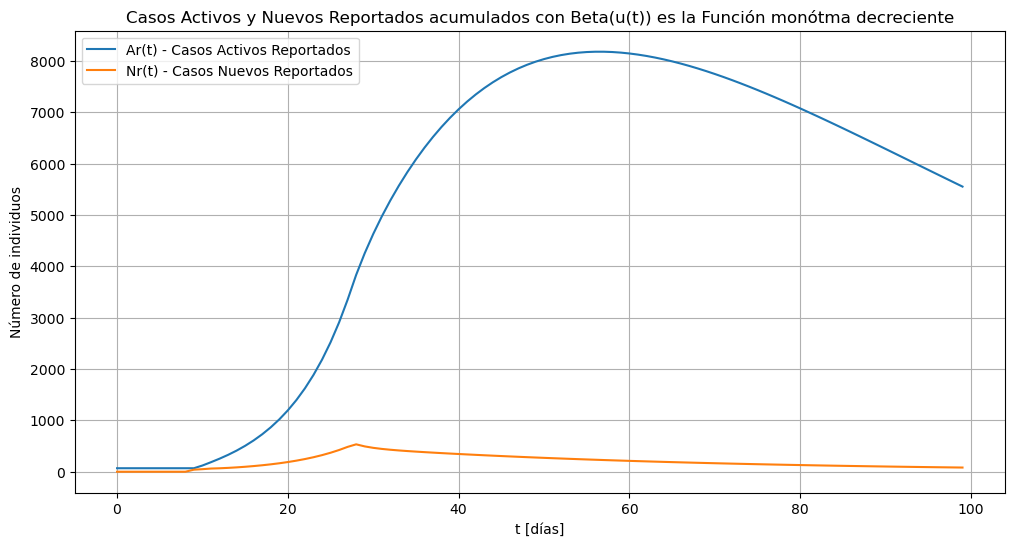

In [570]:
Nr = [epsilon * E[t[i] - tau_m] if t[i] >= tau_m else 0 for i in range(len(t))]
Ar = [I[t[i] - tau_m] + L[t[i] - tau_m] if t[i] >= tau_m else I0 + L0 for i in range(len(t))] 
plt.figure(figsize=(12, 6))
plt.plot(t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(t, Nr, label='Nr(t) - Casos Nuevos Reportados')
plt.title(f'Casos Activos y Nuevos Reportados acumulados con Beta(u(t)) es la Función monótoma decreciente')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos')
plt.legend()
plt.grid(True)
plt.show()

# Caso donde no hay restricciones
Es decir, cuando $\beta_0$ es forzada a 1.


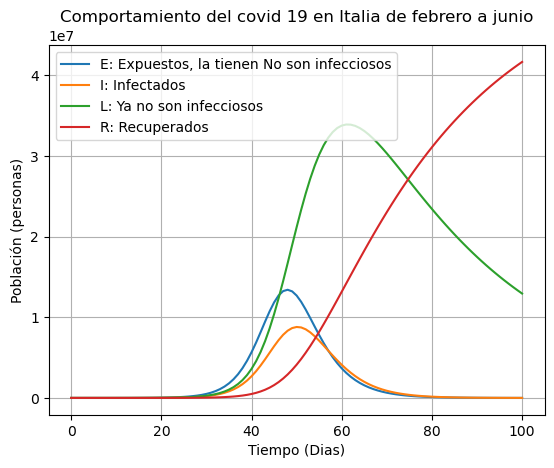

In [571]:
def edoS_beta_constante(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return -beta*1*(y/N)*I

def edoE_beta_constante(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return beta*1* I * S / N - epsilon * y

# Parámetros iniciales
R0 = 4  #El número básico de reproducción, ajustar según el país o la situación
S0 = 59100000  # Condición inicial

I0 = 67  # Condición inicial
L0 = 1  # Condición inicial
R0 = 4  # Condición inicial
U0 = 1  # Condición inicial
t0 = 0  # Tiempo inicial
tf = 100  # Tiempo final
h = 1  # Tamaño de paso
beta = 1.3
N = 59100000
#Calculando gamma (tasa de recuperación) y r0 (eigenvalor)

epsilon = 1 / 4.3
landa = 1 / 3.1
delta = 1 / 33
tau_m = 9  #Retraso en días
t1 = 2
rho1 = 0.56
t2 = 19
rho2 = 0.205
r0 = ((-(epsilon + landa)) + np.sqrt((epsilon + landa)**2 + 4 * epsilon * (beta - landa))) / 2

E0 = beta * I0 / (r0 + epsilon)  # Condición inicial

tiempo, S, E, I, L, R, U = runge_kutta_cuarto_orden(edoS_beta_constante, edoE_beta_constante, edoI, edoL, edoR,edoU, S0, E0, I0, L0, R0, U0, t0, tf, h, beta, N, epsilon, landa, delta)

# Grafica los resultados
plt.plot(tiempo, E, label='E: Expuestos, la tienen No son infecciosos')
#plt.plot(tiempo, S, label='S: Susceptibles')
plt.plot(tiempo, I, label='I: Infectados')
plt.plot(tiempo, L, label='L: Ya no son infecciosos')
plt.plot(tiempo, R, label='R: Recuperados')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Población (personas)')
plt.title('Comportamiento del covid 19 en Italia de febrero a junio')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Perfil de Beta. Tasa de transmision efectiva para el modelo de Italia')

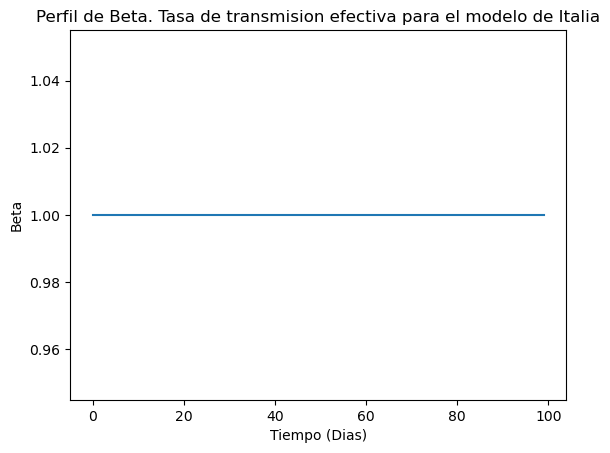

In [572]:
#El perfil de u ingresado para el caso de italia
t = np.arange(tf)  
y=[100]
y = [1 for x in t if True]

plt.plot(y)   
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Beta')
plt.title('Perfil de Beta. Tasa de transmision efectiva para el modelo de Italia')  

# Analizando bajo este modelo $N_r (t)$, $A_r (t)$

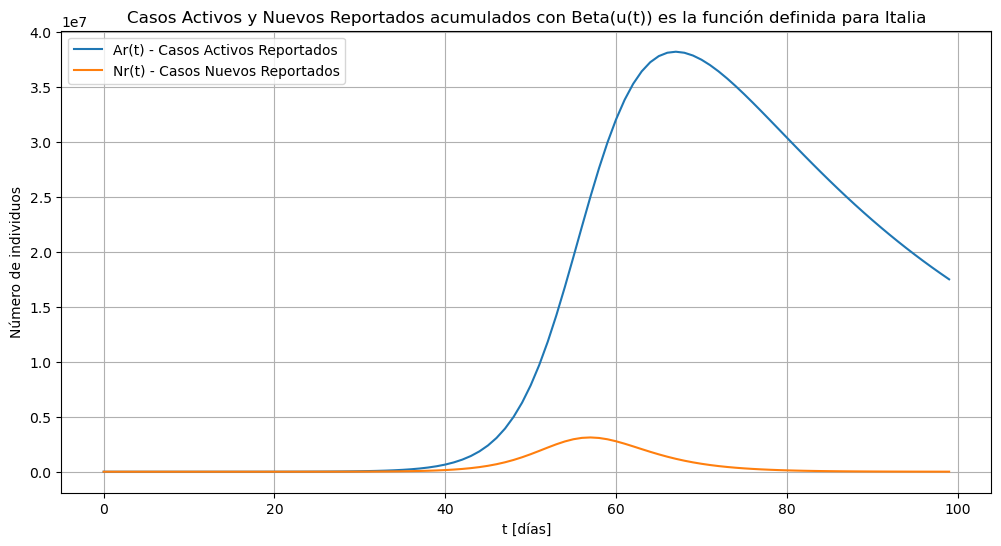

In [573]:
Nr = [epsilon * E[t[i] - tau_m] if t[i] >= tau_m else 0 for i in range(len(t))]
Ar = [I[t[i] - tau_m] + L[t[i] - tau_m] if t[i] >= tau_m else I0 + L0 for i in range(len(t))]
plt.figure(figsize=(12, 6))
plt.plot(t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(t, Nr, label='Nr(t) - Casos Nuevos Reportados')
plt.title(f'Casos Activos y Nuevos Reportados acumulados con Beta(u(t)) es la función definida para Italia')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos')
plt.legend()
plt.grid(True)
plt.show()

# Caso donde las restricciones son máximas 
En este caso cuando $\beta_0$ es forzada a 0.

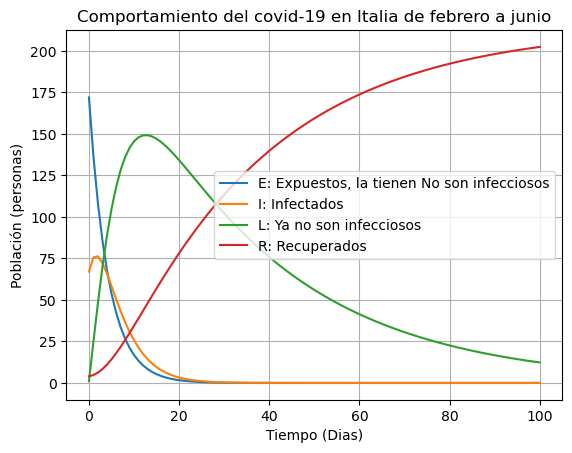

In [574]:
def edoS_beta_constante(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return -beta*0*(y/N)*I

def edoE_beta_constante(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return beta*0* I * S / N - epsilon * y


# Parámetros iniciales
R0 = 4  #El número básico de reproducción, ajustar según el país o la situación
S0 = 59100000  # Condición inicial

I0 = 67  # Condición inicial
L0 = 1  # Condición inicial
R0 = 4  # Condición inicial
U0 = 1  # Condición inicial
t0 = 0  # Tiempo inicial
tf = 100  # Tiempo final
h = 1  # Tamaño de paso
beta = 1.3
N = 59100000
#Calculando gamma (tasa de recuperación) y r0 (eigenvalor)

epsilon = 1 / 4.3
landa = 1 / 3.1
delta = 1 / 33
tau_m = 9  #Retraso en días
t1 = 2
rho1 = 0.56
t2 = 19
rho2 = 0.205
r0 = ((-(epsilon + landa)) + np.sqrt((epsilon + landa)**2 + 4 * epsilon * (beta - landa))) / 2

E0 = beta * I0 / (r0 + epsilon)  # Condición inicial

tiempo, S, E, I, L, R, U = runge_kutta_cuarto_orden(edoS_beta_constante, edoE_beta_constante, edoI, edoL, edoR,edoU, S0, E0, I0, L0, R0, U0, t0, tf, h, beta, N, epsilon, landa, delta)

# Grafica los resultados
plt.plot(tiempo, E, label='E: Expuestos, la tienen No son infecciosos')
#plt.plot(tiempo, S, label='S: Susceptibles')
plt.plot(tiempo, I, label='I: Infectados')
plt.plot(tiempo, L, label='L: Ya no son infecciosos')
plt.plot(tiempo, R, label='R: Recuperados')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Población (personas)')
plt.title('Comportamiento del covid-19 en Italia de febrero a junio')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Perfil de Beta. Tasa de transmisión efectiva para el modelo de Italia')

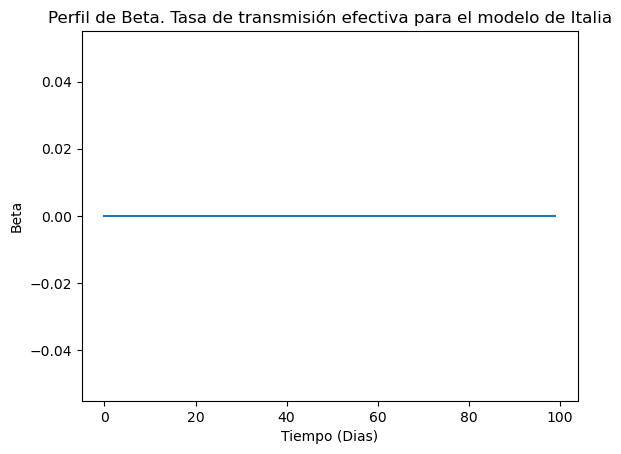

In [575]:
#El perfil de u ingresado para el caso de italia
t = np.arange(tf)  
y=[100]
y = [0 for x in t if True]

plt.plot(y)   
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Beta')
plt.title('Perfil de Beta. Tasa de transmisión efectiva para el modelo de Italia')  

# Analizando bajo este modelo $N_r (t)$, $A_r (t)$


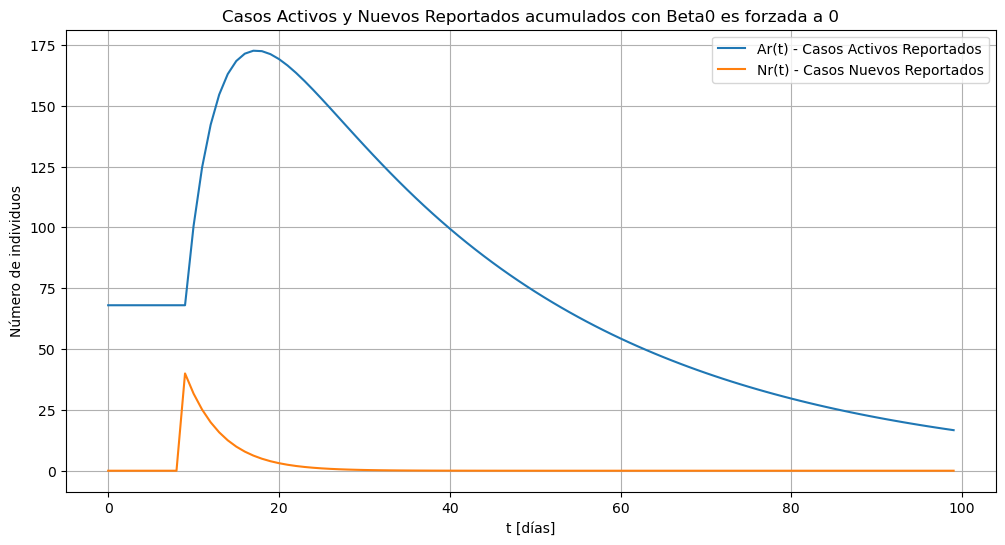

In [576]:

Nr = [epsilon * E[t[i] - tau_m] if t[i] >= tau_m else 0 for i in range(len(t))]
Ar = [I[t[i] - tau_m] + L[t[i] - tau_m] if t[i] >= tau_m else I0 + L0 for i in range(len(t))]

plt.figure(figsize=(12, 6))
plt.plot(t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(t, Nr, label='Nr(t) - Casos Nuevos Reportados')
plt.title(f'Casos Activos y Nuevos Reportados acumulados con Beta0 es forzada a {0}')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos')
plt.legend()
plt.grid(True)
plt.show()